**Activity 4 (Thursday)**  

1. Show a plot of the total number of responses.  
2. Show a plot of the response by the sales channel.  
3. Show a plot of the response by the total claim amount.  
4. Show a plot of the response by income.  
5. (Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.  
6. Clean your notebook and make it readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.  

In [1]:
import numpy as np  #Loading needed libraries and reading the files
import pandas as pd

df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
df1 = pd.read_csv('Wed.csv')
df1

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [4]:
import pandas as pd #Loading more libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1. Show a plot of the total number of responses.**

In [15]:
response = df['response'].value_counts() #Counting how many there are "yes" and "no" responses in Response column
response

no     9316
yes    1373
Name: response, dtype: int64

Text(0, 0.5, 'count')

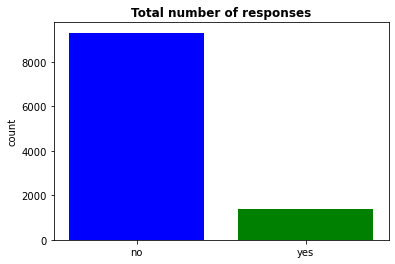

In [124]:
# create figure and axes
plt.bar(response.index, response, color=('blue','green'))
# set title
plt.title('Total number of responses', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["no","yes"])
plt.ylabel("count")

**2. Show a plot of the response by the sales channel.**

In [19]:
response_counts = df['response'].value_counts() #Counting how many there are "yes" and "no" responses in Response column
response_counts

no     9316
yes    1373
Name: response, dtype: int64

In [34]:
sales_channel = df.groupby(['sales_channel', 'response'])['response'].count().rename('count').reset_index() #Counting how many 'yes' and 'no' responses got each sales channel
sales_channel

,sales_channel,response,count
0,agent,no,3340
1,agent,yes,679
2,branch,no,2665
3,branch,yes,310
4,call center,no,1890
5,call center,yes,209
6,web,no,1421
7,web,yes,175


<AxesSubplot:title={'center':'Response by sales channel'}, xlabel='sales_channel', ylabel='count'>

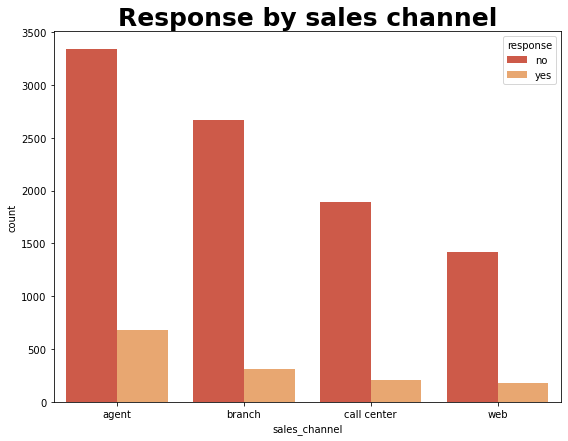

In [51]:
plt.figure(figsize=(20,15)) #How many 'yes' and 'no' responses got sales channel
plt.subplot(2,2,1)
plt.title('Response by sales channel', size='25', fontweight='bold')

sns.barplot(x='sales_channel', y='count', hue = 'response', data = sales_channel)

#The amount of 'yes' responses is almost similair through all the channels. It fluctuates between 175 and 679 responses.
# A lot of Agent work is a waste work.
# As using Agent is very expensive, I would recommend to double our efforts on web. 
#It will be cheaper and it will bring us more responses than using an agent.


**3. Show a plot of the response by the total claim amount.**

In [58]:
total_claim_amount1 = df.groupby(['total_claim_amount', 'response'])['response'].count().rename('count').reset_index() 
total_claim_amount1

,total_claim_amount,response,count
0,0,no,9
1,1,no,9
2,2,no,12
3,3,no,9
4,4,no,12
...,...,...,...
1358,2345,no,1
1359,2452,no,1
1360,2552,no,2
1361,2759,no,1


In [118]:
bin_labels = ['low_number_of_claim_amount', 'mid_number_of_claim_amount','high_number_of_claim_amount'] #As the amount of unique total_claim_amount is too big, I decided to bucket the information in the total_claim_amount into 3 groups. 
#After bucketing a new column has been created.
df['grouped_total_claim_amounts'] = pd.qcut(df['total_claim_amount'],
                              q=3,
                              labels=bin_labels)
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,new,grouped_total_claim_amounts,grouped_income
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize,low,low_number_of_claim_amount,mid_income
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,personal auto,personal l3,offer4,call center,744,four-door car,medsize,high,high_number_of_claim_amount,high_income
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,personal auto,personal l3,offer3,call center,480,suv,medsize,mid,mid_number_of_claim_amount,low_income
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize,mid,mid_number_of_claim_amount,mid_income
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,personal auto,personal l2,offer1,branch,707,four-door car,medsize,high,high_number_of_claim_amount,low_income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,personal auto,personal l1,offer3,web,1214,luxury car,medsize,high,high_number_of_claim_amount,mid_income
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,personal auto,personal l3,offer2,branch,273,four-door car,medsize,low,low_number_of_claim_amount,mid_income
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize,mid,mid_number_of_claim_amount,mid_income
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,personal auto,personal l1,offer1,branch,618,suv,medsize,high,high_number_of_claim_amount,mid_income


In [120]:
df.new.value_counts() 

low     3628
high    3556
mid     3505
Name: new, dtype: int64

In [121]:
total_claim_amount2 = df.groupby(['grouped_total_claim_amounts', 'response'])['response'].count().rename('count2').reset_index() 
total_claim_amount2  #Showing how many 'yes', 'no' responses are in each bucket (low, mid, high)

,grouped_total_claim_amounts,response,count2
0,low_number_of_claim_amount,no,3288
1,low_number_of_claim_amount,yes,340
2,mid_number_of_claim_amount,no,2976
3,mid_number_of_claim_amount,yes,529
4,high_number_of_claim_amount,no,3052
5,high_number_of_claim_amount,yes,504


<AxesSubplot:title={'center':'Response by grouped total claim amount'}, xlabel='grouped_total_claim_amounts', ylabel='count2'>

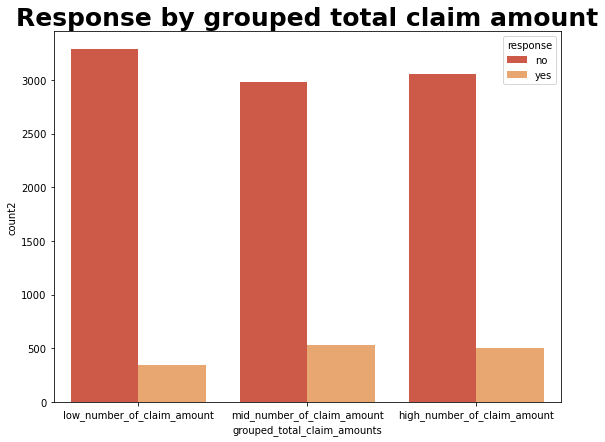

In [122]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response by grouped total claim amount', size='25', fontweight='bold')

sns.barplot(x='grouped_total_claim_amounts', y='count2', hue = 'response', data = total_claim_amount2)

#The amount of claim is not related to the response. 

**4. Show a plot of the response by income.**

In [97]:
income1 = df.groupby(['income', 'response'])['response'].count().rename('count').reset_index() 
income1

,income,response,count
0,10037,no,1
1,10074,no,1
2,10088,no,1
3,10097,no,2
4,10105,no,1
...,...,...,...
8344,99934,no,1
8345,99960,no,1
8346,99961,no,1
8347,99971,no,1


In [98]:
bin_labels = ['low_income', 'mid_income','high_income']
df['grouped_income'] = pd.qcut(df['income'],
                              q=3,
                              labels=bin_labels)
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,new,grouped_total_claim_amounts,grouped_income
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize,low,low,mid_income
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,personal auto,personal l3,offer4,call center,744,four-door car,medsize,high,high,high_income
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,personal auto,personal l3,offer3,call center,480,suv,medsize,mid,mid,low_income
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize,mid,mid,mid_income
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,personal auto,personal l2,offer1,branch,707,four-door car,medsize,high,high,low_income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,personal auto,personal l1,offer3,web,1214,luxury car,medsize,high,high,mid_income
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,personal auto,personal l3,offer2,branch,273,four-door car,medsize,low,low,mid_income
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize,mid,mid,mid_income
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,personal auto,personal l1,offer1,branch,618,suv,medsize,high,high,mid_income


In [100]:
income2 = df.groupby(['grouped_income', 'response'])['response'].count().rename('count3').reset_index() 
income2

,grouped_income,response,count3
0,low_income,no,2997
1,low_income,yes,571
2,mid_income,no,3132
3,mid_income,yes,426
4,high_income,no,3187
5,high_income,yes,376


<AxesSubplot:title={'center':'Response by income'}, xlabel='grouped_income', ylabel='count3'>

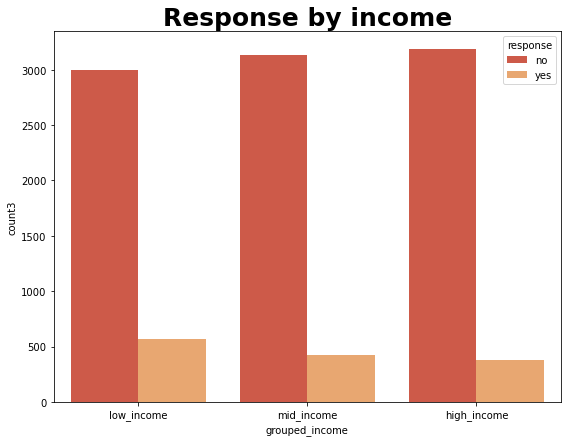

In [106]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response by income', size='25', fontweight='bold')

sns.barplot(x='grouped_income', y='count3', hue = 'response', data = income2)

#Customers with lower income tend to respond more.

**5. (Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.**

**1) Response per Region**

In [105]:
region1 = df.groupby(['region', 'response'])['response'].count().rename('count').reset_index() 
region1

,region,response,count
0,central,no,2663
1,central,yes,408
2,east,no,805
3,east,yes,124
4,north west,no,2625
5,north west,yes,386
6,west region,no,3223
7,west region,yes,455


<AxesSubplot:title={'center':'Response per region'}, xlabel='region', ylabel='count'>

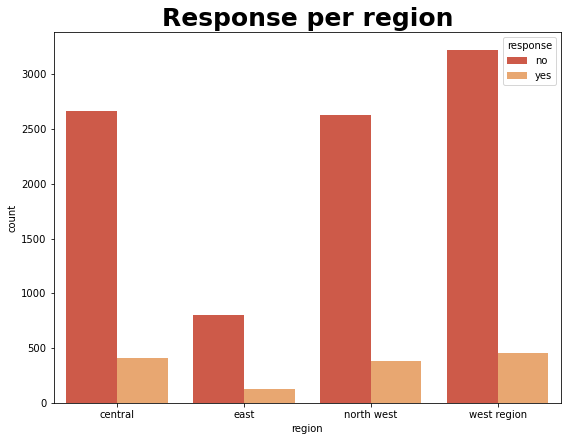

In [107]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response per region', size='25', fontweight='bold')

sns.barplot(x='region', y='count', hue = 'response', data = region1)
#No too much of activity in East region.

**2) Income per Region**

In [108]:
region2 = df.groupby(['region', 'grouped_income'])['grouped_income'].count().rename('count').reset_index() 
region2

,region,grouped_income,count
0,central,low_income,994
1,central,mid_income,1064
2,central,high_income,1013
3,east,low_income,308
4,east,mid_income,297
5,east,high_income,324
6,north west,low_income,976
7,north west,mid_income,1020
8,north west,high_income,1015
9,west region,low_income,1290


<AxesSubplot:title={'center':'Income per Region'}, xlabel='region', ylabel='count'>

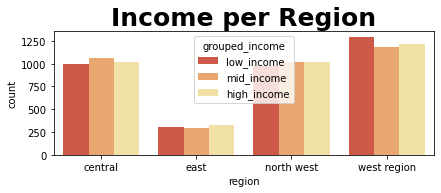

In [135]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
plt.title('Income per Region', size='25', fontweight='bold')

sns.barplot(x='region', y='count', hue = 'grouped_income', data = region2)

3. **Education and total claim amounts**

In [130]:
total_claim_amount3 = df.groupby(['grouped_total_claim_amounts', 'education'])['education'].count().rename('count').reset_index() 
total_claim_amount3  

,grouped_total_claim_amounts,education,count
0,low_number_of_claim_amount,bachelor,1130
1,low_number_of_claim_amount,college,1082
2,low_number_of_claim_amount,doctor,182
3,low_number_of_claim_amount,high school or below,822
4,low_number_of_claim_amount,master,412
5,mid_number_of_claim_amount,bachelor,1076
6,mid_number_of_claim_amount,college,1058
7,mid_number_of_claim_amount,doctor,136
8,mid_number_of_claim_amount,high school or below,970
9,mid_number_of_claim_amount,master,265


<AxesSubplot:title={'center':'Claims by education'}, xlabel='grouped_total_claim_amounts', ylabel='count'>

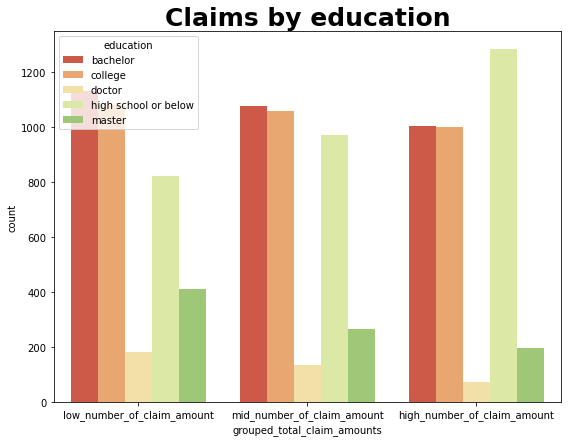

In [127]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Claims by education', size='25', fontweight='bold')

sns.barplot(x='grouped_total_claim_amounts', y='count', hue = 'education', data = total_claim_amount3  )

Customers with master and doctor degrees claim the least. It is recommended to targer this sector of customers.

**4. Claims per policy type**

In [131]:
total_claim_amount3 = df.groupby(['grouped_total_claim_amounts', 'policy_type'])['policy_type'].count().rename('count').reset_index() 
total_claim_amount3  

,grouped_total_claim_amounts,policy_type,count
0,low_number_of_claim_amount,corporate auto,794
1,low_number_of_claim_amount,personal auto,2683
2,low_number_of_claim_amount,special auto,151
3,mid_number_of_claim_amount,corporate auto,778
4,mid_number_of_claim_amount,personal auto,2601
5,mid_number_of_claim_amount,special auto,126
6,high_number_of_claim_amount,corporate auto,740
7,high_number_of_claim_amount,personal auto,2653
8,high_number_of_claim_amount,special auto,163


<AxesSubplot:title={'center':'Claims by policy type'}, xlabel='grouped_total_claim_amounts', ylabel='count'>

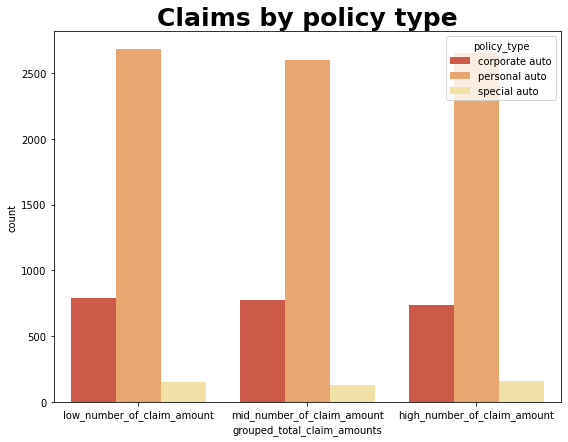

In [132]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Claims by policy type', size='25', fontweight='bold')

sns.barplot(x='grouped_total_claim_amounts', y='count', hue = 'policy_type', data = total_claim_amount3  )

In [ ]:
Customers with personal cars tend to claim more. It is better to sell cars for corporations or as special cars. 

**5. Claims per vehicle class**

In [137]:
total_claim_amount4 = df.groupby(['grouped_total_claim_amounts', 'vehicle_class'])['vehicle_class'].count().rename('count').reset_index() 
total_claim_amount4

,grouped_total_claim_amounts,vehicle_class,count
0,low_number_of_claim_amount,four-door car,2196
1,low_number_of_claim_amount,luxury car,19
2,low_number_of_claim_amount,luxury suv,20
3,low_number_of_claim_amount,sports car,130
4,low_number_of_claim_amount,suv,392
5,low_number_of_claim_amount,two-door car,871
6,mid_number_of_claim_amount,four-door car,2161
7,mid_number_of_claim_amount,luxury car,7
8,mid_number_of_claim_amount,luxury suv,11
9,mid_number_of_claim_amount,sports car,82


<AxesSubplot:title={'center':'Claims by vehicle class'}, xlabel='grouped_total_claim_amounts', ylabel='count'>

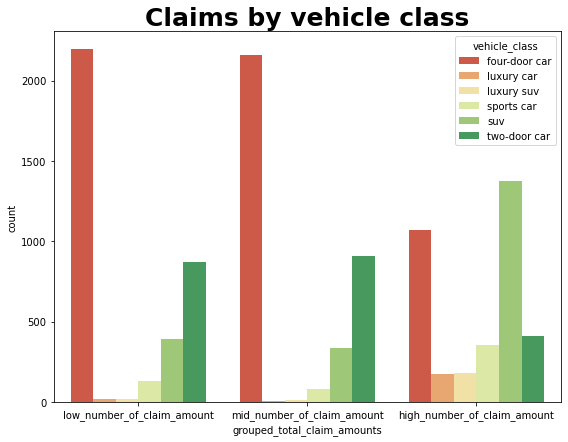

In [138]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Claims by vehicle class', size='25', fontweight='bold')

sns.barplot(x='grouped_total_claim_amounts', y='count', hue = 'vehicle_class', data = total_claim_amount4  )

The users of Four-door cars tend to ask for low or middle claims.
Users of SUV tend to ask for high claims.

**6. Claims per vehicle size**

In [139]:
total_claim_amount5 = df.groupby(['grouped_total_claim_amounts', 'vehicle_size'])['vehicle_size'].count().rename('count').reset_index() 
total_claim_amount5

,grouped_total_claim_amounts,vehicle_size,count
0,low_number_of_claim_amount,large,388
1,low_number_of_claim_amount,medsize,2785
2,low_number_of_claim_amount,small,455
3,mid_number_of_claim_amount,large,365
4,mid_number_of_claim_amount,medsize,2345
5,mid_number_of_claim_amount,small,795
6,high_number_of_claim_amount,large,359
7,high_number_of_claim_amount,medsize,2398
8,high_number_of_claim_amount,small,799


<AxesSubplot:title={'center':'Claims by vehicle size'}, xlabel='grouped_total_claim_amounts', ylabel='count'>

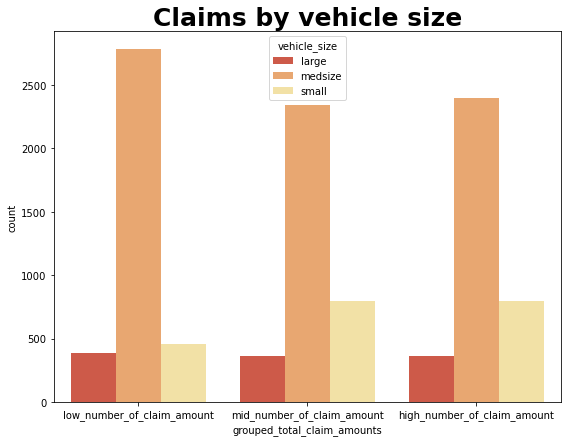

In [141]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Claims by vehicle size', size='25', fontweight='bold')

sns.barplot(x='grouped_total_claim_amounts', y='count', hue = 'vehicle_size', data = total_claim_amount5  )

Medsize cars generate most of claims (in all categories: low, med, high)

**7. Claims by gender**

In [143]:
total_claim_amount6 = df.groupby(['grouped_total_claim_amounts', 'gender'])['gender'].count().rename('count').reset_index() 
total_claim_amount6

,grouped_total_claim_amounts,gender,count
0,low_number_of_claim_amount,f,2005
1,low_number_of_claim_amount,m,1623
2,mid_number_of_claim_amount,f,1782
3,mid_number_of_claim_amount,m,1723
4,high_number_of_claim_amount,f,1682
5,high_number_of_claim_amount,m,1874


<AxesSubplot:title={'center':'Claims by gender'}, xlabel='grouped_total_claim_amounts', ylabel='count'>

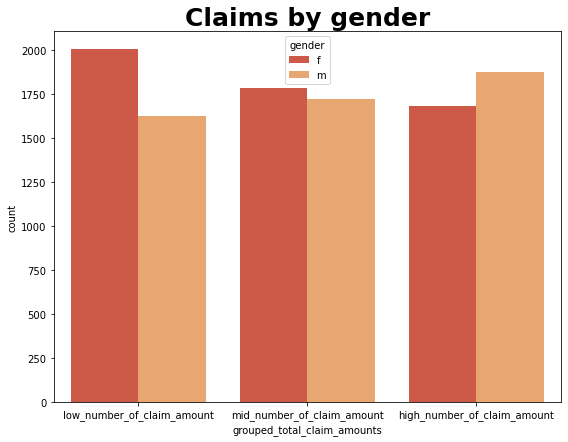

In [144]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Claims by gender', size='25', fontweight='bold')

sns.barplot(x='grouped_total_claim_amounts', y='count', hue = 'gender', data = total_claim_amount6  )